In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from features import lat_lng2dist_ang
from cmdstanpy import CmdStanModel, set_cmdstan_path
import contextily as ctx
import os
import arviz as az

sns.set_theme()

GEOLOCATION = "lj"
TRANSFORMED_CSV = f"datasets/processed/{GEOLOCATION}/transformed.csv"
GT_POINTS_CSV = f"datasets/raw/{GEOLOCATION}/gt_points.csv"
CMDSTAN_PATH = "/home/klemen/micromamba/envs/gps/bin/cmdstan"
STAN_MODEL_PATH = "bivariate_normal.stan"

set_cmdstan_path(CMDSTAN_PATH)


transformed_df = pd.read_csv(TRANSFORMED_CSV)
gt_points_df = pd.read_csv(GT_POINTS_CSV)
gt_points_df["plot_label"] = gt_points_df["name"]
transformed_df["plot_label"] = transformed_df["measured_from"] + " measurements"

/home/klemen/micromamba/envs/gps/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
gt_points_df

,name,lat,lng,plot_label
0,P1,46.050717,14.469448,P1
1,P2,46.050919,14.468425,P2
2,P3,46.050141,14.468594,P3
3,E,46.050578,14.468767,E


In [3]:
transformed_df

,measured_from,lat,lng,distance,angle_rad,angle_deg,plot_label
0,P1,46.050728,14.469481,2.803403,1.132911,64.911039,P1 measurements
1,P1,46.050725,14.469472,2.088404,1.135859,65.079935,P1 measurements
2,P1,46.050719,14.469464,1.276303,1.363691,78.133761,P1 measurements
3,P1,46.050714,14.469461,1.093313,1.901560,108.951337,P1 measurements
4,P1,46.050706,14.469458,1.520759,2.572826,147.412055,P1 measurements
5,P1,46.050700,14.469453,1.938310,2.939471,168.419283,P1 measurements
6,P1,46.050731,14.469450,1.507559,0.115765,6.632847,P1 measurements
7,P1,46.050700,14.469453,1.938310,2.939471,168.419283,P1 measurements
8,P1,46.050731,14.469450,1.507559,0.115765,6.632847,P1 measurements
9,P1,46.050728,14.469436,1.491446,5.634734,322.846489,P1 measurements


/home/klemen/micromamba/envs/gps/lib/python3.10/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


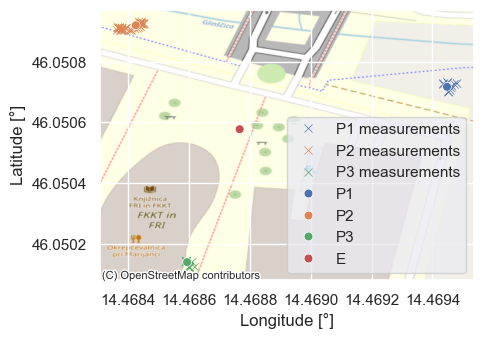

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(
    data=transformed_df, x="lng", y="lat", hue="plot_label", ax=ax, marker="x"
)
sns.scatterplot(data=gt_points_df, x="lng", y="lat", hue="plot_label", ax=ax, s=40)
ctx.add_basemap(ax, crs="epsg:4326", source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_xlabel("Longitude [°]")
ax.set_ylabel("Latitude [°]")
# disable scientific notation
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.legend(title="")
# ax.legend().set_visible(False)
# Save the plot
plt.tight_layout()
plt.savefig(f"figs/{GEOLOCATION}_geomap.png")

In [5]:
P1_lat, P1_lng = (
    gt_points_df[gt_points_df["name"] == "P1"][["lat", "lng"]].values[0].tolist()
)
P2_lat, P2_lng = (
    gt_points_df[gt_points_df["name"] == "P2"][["lat", "lng"]].values[0].tolist()
)
P3_lat, P3_lng = (
    gt_points_df[gt_points_df["name"] == "P3"][["lat", "lng"]].values[0].tolist()
)
E_lat, E_lng = (
    gt_points_df[gt_points_df["name"] == "E"][["lat", "lng"]].values[0].tolist()
)
E_P1_dist, E_P1_angle_rad, E_P1_angle_deg = lat_lng2dist_ang(
    [P1_lat, P1_lng], [E_lat, E_lng]
)
E_P2_dist, E_P2_angle_rad, E_P2_angle_deg = lat_lng2dist_ang(
    [P2_lat, P2_lng], [E_lat, E_lng]
)
E_P3_dist, E_P3_angle_rad, E_P3_angle_deg = lat_lng2dist_ang(
    [P3_lat, P3_lng], [E_lat, E_lng]
)

print(f"P1: {P1_lat}, {P1_lng}")
print(f"P2: {P2_lat}, {P2_lng}")
print(f"P3: {P3_lat}, {P3_lng}")
print(f"E: {E_lat}, {E_lng}")
print(
    f"E using P1 as the center: dist={E_P1_dist}, angle_rad={E_P1_angle_rad}, angle_deg={E_P1_angle_deg}"
)
print(
    f"E using P2 as the center: dist={E_P2_dist}, angle_rad={E_P2_angle_rad}, angle_deg={E_P2_angle_deg}"
)
print(
    f"E using P3 as the center: dist={E_P3_dist}, angle_rad={E_P3_angle_rad}, angle_deg={E_P3_angle_deg}"
)


P1: 46.05071708333333, 14.469447750000002
P2: 46.05091916666666, 14.46842538888889
P3: 46.05014119444444, 14.468594055555556
E: 46.050577777777775, 14.468766666666667
E using P1 as the center: dist=54.93803082601422, angle_rad=4.426674369248041, angle_deg=253.62975863664855
E using P2 as the center: dist=46.233344548462505, angle_rad=2.533522319111691, angle_deg=145.16013618729644
E using P3 as the center: dist=50.33242726496936, angle_rad=0.2686313816489416, angle_deg=15.391444413252428


In [6]:
# choose pair of proposals to compare and remove the rest
COMPARE_PROPOSALS = ["P2", "P3"]
gt_points_df = gt_points_df[gt_points_df["name"].isin(COMPARE_PROPOSALS + ["E"])].copy().reset_index(drop=True)
transformed_df = transformed_df[transformed_df["measured_from"].isin(COMPARE_PROPOSALS)].copy().reset_index(drop=True)

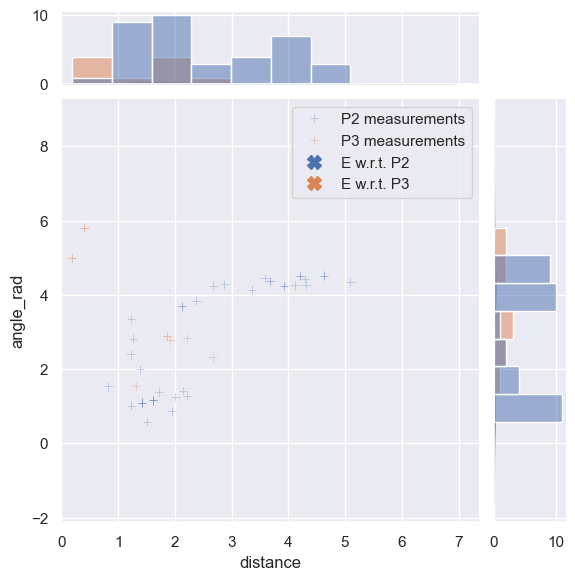

In [7]:
#! P1(measured) and P2(measured) are measurements that are transformed to dist and angle WITH RESPECT TO THEIR GROUND TRUTH (P1 or P2)
g = sns.jointplot(
    data=transformed_df,
    x="distance",
    y="angle_rad",
    hue="plot_label",
    kind="scatter",
    marginal_ticks=True,
    joint_kws={"marker": "+"},
    alpha=0.4
)

# lower bound for distance is 0
g.ax_joint.set_xlim(left=0)
g.plot_marginals(sns.histplot)

proposals = gt_points_df["name"].values.tolist()
proposals.remove("E")

for proposal_name in proposals:
    proposal_lat_lng = gt_points_df[gt_points_df["name"] == proposal_name][
        ["lat", "lng"]
    ].values[0]
    dist, angle_rad, _ = lat_lng2dist_ang(proposal_lat_lng, [E_lat, E_lng])
    g.ax_joint.plot(
        dist, angle_rad, "X", label=f"E w.r.t. {proposal_name}", markersize=10
    )
g.ax_joint.legend()

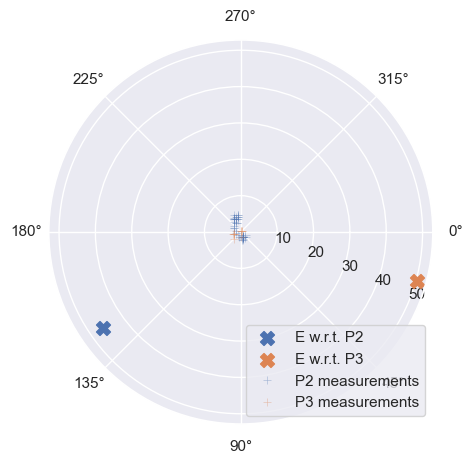

In [8]:
fig, ax = plt.subplots(subplot_kw=dict(projection="polar"))

for proposal_name in proposals:
    proposal_lat_lng = gt_points_df[gt_points_df["name"] == proposal_name][
        ["lat", "lng"]
    ].values[0]
    dist, angle_rad, _ = lat_lng2dist_ang(proposal_lat_lng, [E_lat, E_lng])
    ax.scatter(angle_rad, dist, marker="X", label=f"E w.r.t. {proposal_name}", s=100)


sns.scatterplot(
    data=transformed_df,
    x="angle_rad",
    y="distance",
    hue="plot_label",
    ax=ax,
    marker="+",
    alpha=0.4,
)
# ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
# ax.set_rlabel_position(0)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.legend(title="", loc="lower right")
plt.tight_layout()
plt.savefig(f"figs/{GEOLOCATION}_polar.pdf")

In [9]:
# P1 vs P2
# stan_data = {
#     "N1": transformed_df[transformed_df["measured_from"] == "P1"].shape[0],
#     "N2": transformed_df[transformed_df["measured_from"] == "P2"].shape[0],
#     "y1": transformed_df[transformed_df["measured_from"] == "P1"][
#         ["distance", "angle_rad"]
#     ].values.tolist(),
#     "y2": transformed_df[transformed_df["measured_from"] == "P2"][
#         ["distance", "angle_rad"]
#     ].values.tolist(),
#     "E_p1": [E_P1_dist, E_P1_angle_rad],
#     "E_p2": [E_P2_dist, E_P2_angle_rad],
# }

# P1 vs P3
# stan_data = {
#     "N1": transformed_df[transformed_df["measured_from"] == "P1"].shape[0],
#     "N2": transformed_df[transformed_df["measured_from"] == "P3"].shape[0],
#     "y1": transformed_df[transformed_df["measured_from"] == "P1"][
#         ["distance", "angle_rad"]
#     ].values.tolist(),
#     "y2": transformed_df[transformed_df["measured_from"] == "P3"][
#         ["distance", "angle_rad"]
#     ].values.tolist(),
#     "E_p1": [E_P1_dist, E_P1_angle_rad],
#     "E_p3": [E_P3_dist, E_P3_angle_rad],
# }

# P2 and P3
stan_data = {
    "N1": transformed_df[transformed_df["measured_from"] == "P2"].shape[0],
    "N2": transformed_df[transformed_df["measured_from"] == "P3"].shape[0],
    "y1": transformed_df[transformed_df["measured_from"] == "P2"][
        ["distance", "angle_rad"]
    ].values.tolist(),
    "y2": transformed_df[transformed_df["measured_from"] == "P3"][
        ["distance", "angle_rad"]
    ].values.tolist(),
    "E_p1": [E_P2_dist, E_P2_angle_rad],
    "E_p2": [E_P3_dist, E_P3_angle_rad],
}
    
# Sanity check to make sure we have selected the measurements corresponding to the correct proposals
# if this fails, than it means that we are comparing e.g. P1 vs P2, but giving the data for P1 vs P3
assert stan_data["N1"] > 0
assert stan_data["N2"] > 0
assert stan_data["N1"] + stan_data["N2"] == transformed_df.shape[0] # transformed_df at this point contains only the measurements for the two proposals we are comparing

model = CmdStanModel(stan_file=STAN_MODEL_PATH)
fit = model.sample(
    data=stan_data,
    chains=4,
    iter_warmup=1000,
    iter_sampling=4000,
    seed=1,
    parallel_chains=os.cpu_count(),
)

display(fit.summary())
print(fit.diagnose())

00:34:11 - cmdstanpy - INFO - Requested 8 parallel_chains but only 4 required, will run all chains in parallel.
00:34:11 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▊         | 00:00 Iteration:  200 / 5000 [  4%]  (Warmup)


chain 1 |█▋        | 00:00 Iteration:  700 / 5000 [ 14%]  (Warmup)


chain 1 |██▉       | 00:00 Iteration: 1200 / 5000 [ 24%]  (Sampling)



chain 1 |███▊      | 00:00 Iteration: 1700 / 5000 [ 34%]  (Sampling)

chain 1 |████▌     | 00:00 Iteration: 2100 / 5000 [ 42%]  (Sampling)


chain 1 |█████▍    | 00:00 Iteration: 2500 / 5000 [ 50%]  (Sampling)


chain 1 |██████▏   | 00:00 Iteration: 2900 / 5000 [ 58%]  (Sampling)


chain 1 |██████▉   | 00:00 Iteration: 3300 / 5000 [ 66%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 3700 / 5000 [ 74%]  (Sampling)


chain 1 |████████▍ | 00:01 Iteration: 4100 / 5000 [ 82%]  (Sampling)


chain 1 |█████████▏| 00:01 Iteration: 4500 / 5000 [ 90%]  (Sampling)


chain 1 |██████████|

00:34:12 - cmdstanpy - INFO - CmdStan done processing.
00:34:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'bivariate_normal.stan', line 21, column 2 to column 34)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'bivariate_normal.stan', line 21, column 2 to column 34)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'bivariate_normal.stan', line 21, column 2 to column 34)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'bivariate_normal.stan', line 21, column 2 to column 34)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'bivariate_normal.stan', line 21, column 2 to column 34)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'bivariate_normal.stan', line 21, column 2 to column 34)
	Exception: lkj_

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-54.39070,0.032354,2.423550,-58.837100,-54.04250,-51.09380,5611.19,1210.35,1.000660
mu1[1],2.63736,0.002193,0.216210,2.276050,2.63870,2.98754,9723.67,2097.43,1.000070
mu1[2],2.90609,0.002596,0.254706,2.487870,2.90632,3.31886,9626.50,2076.47,1.000260
mu2[1],1.29945,0.003518,0.329715,0.760469,1.30221,1.83020,8785.01,1894.96,1.000050
mu2[2],3.69422,0.005797,0.557157,2.804490,3.69049,4.59837,9237.80,1992.62,0.999993
...,...,...,...,...,...,...,...,...,...
"y2_rep[8,2]",3.66839,0.015343,1.843540,0.698379,3.66671,6.66673,14437.30,3114.16,1.000230
"y2_rep[9,1]",1.28903,0.008785,1.096360,-0.488567,1.29167,3.08447,15576.20,3359.83,0.999865
"y2_rep[9,2]",3.71624,0.015574,1.865130,0.713865,3.69645,6.77191,14342.90,3093.80,0.999896
"y2_rep[10,1]",1.29415,0.008873,1.109900,-0.532411,1.29466,3.09723,15647.80,3375.28,0.999964


Processing csv files: /tmp/tmpv4miik8z/bivariate_normalaalixxfx/bivariate_normal-20240901003411_1.csv, /tmp/tmpv4miik8z/bivariate_normalaalixxfx/bivariate_normal-20240901003411_2.csv, /tmp/tmpv4miik8z/bivariate_normalaalixxfx/bivariate_normal-20240901003411_3.csv, /tmp/tmpv4miik8z/bivariate_normalaalixxfx/bivariate_normal-20240901003411_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



array([[<Axes: title={'center': 'mu2\n0'}>,
        <Axes: title={'center': 'mu2\n0'}>],
       [<Axes: title={'center': 'mu2\n1'}>,
        <Axes: title={'center': 'mu2\n1'}>]], dtype=object)

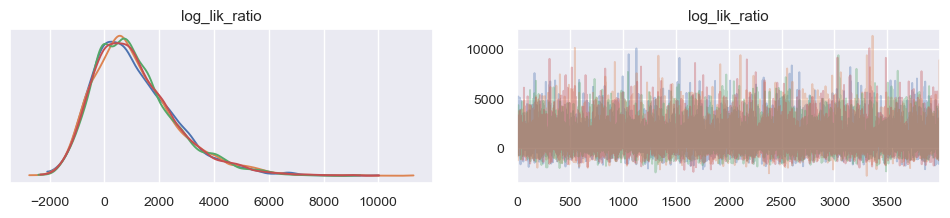

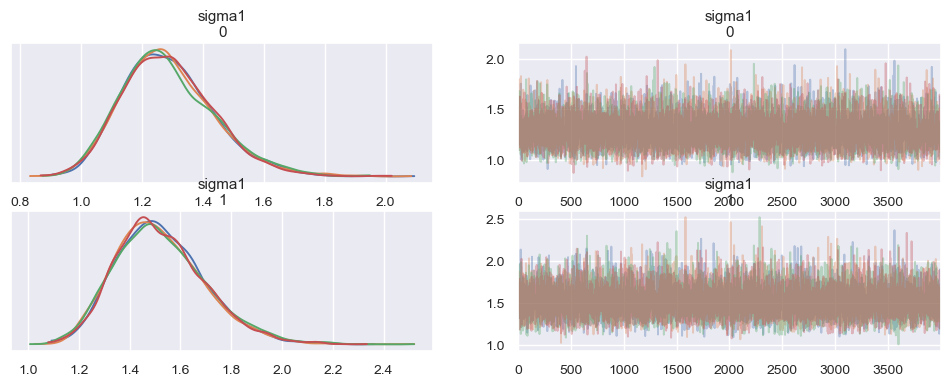

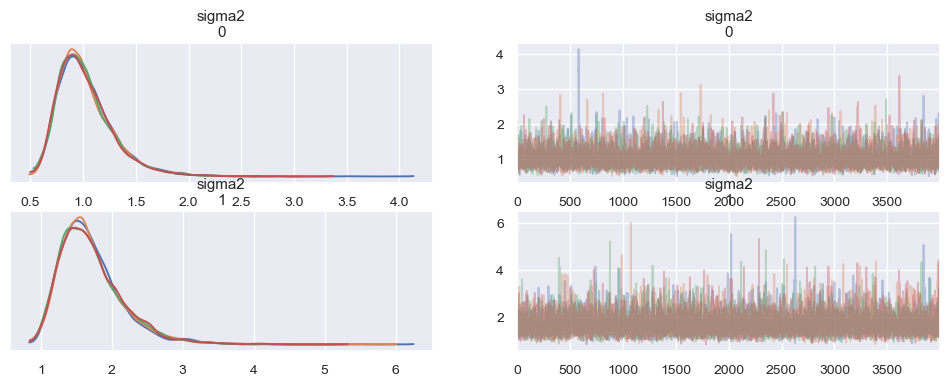

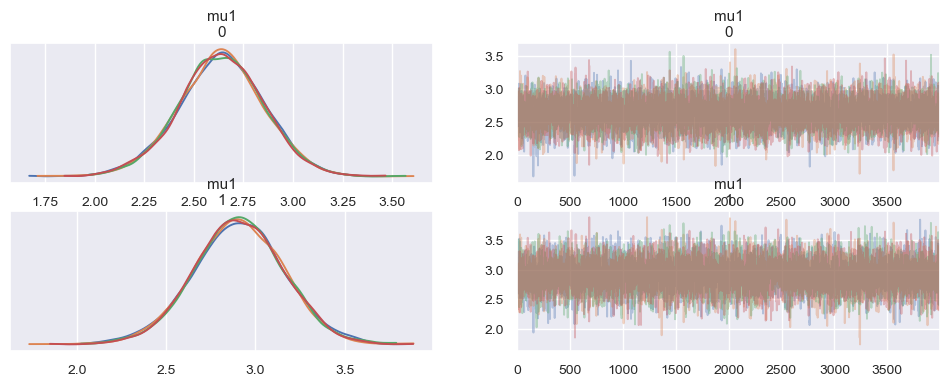

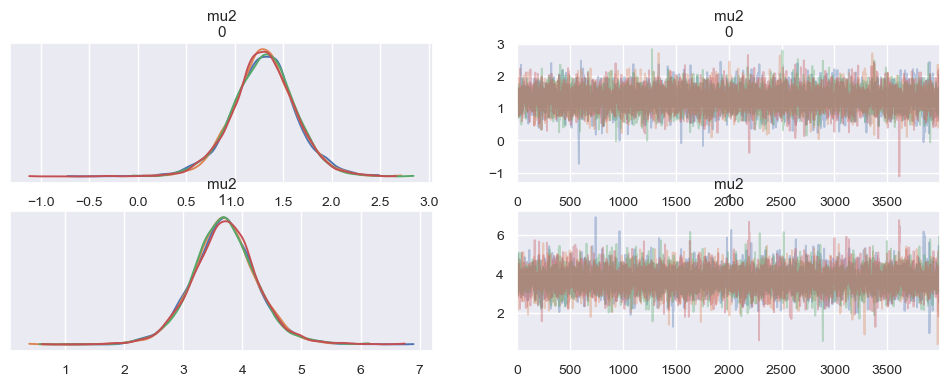

In [10]:
az.plot_trace(fit, compact=False, filter_vars="regex", var_names="log_lik_ratio")
az.plot_trace(fit, compact=False, filter_vars="regex", var_names="^sigma1")
az.plot_trace(fit, compact=False, filter_vars="regex", var_names="^sigma2")
az.plot_trace(fit, compact=False, filter_vars="regex", var_names="^mu1")
az.plot_trace(fit, compact=False, filter_vars="regex", var_names="^mu2")

(16000, 37, 2)
(16000, 10, 2)
(5, 37, 2)
(5, 10, 2)


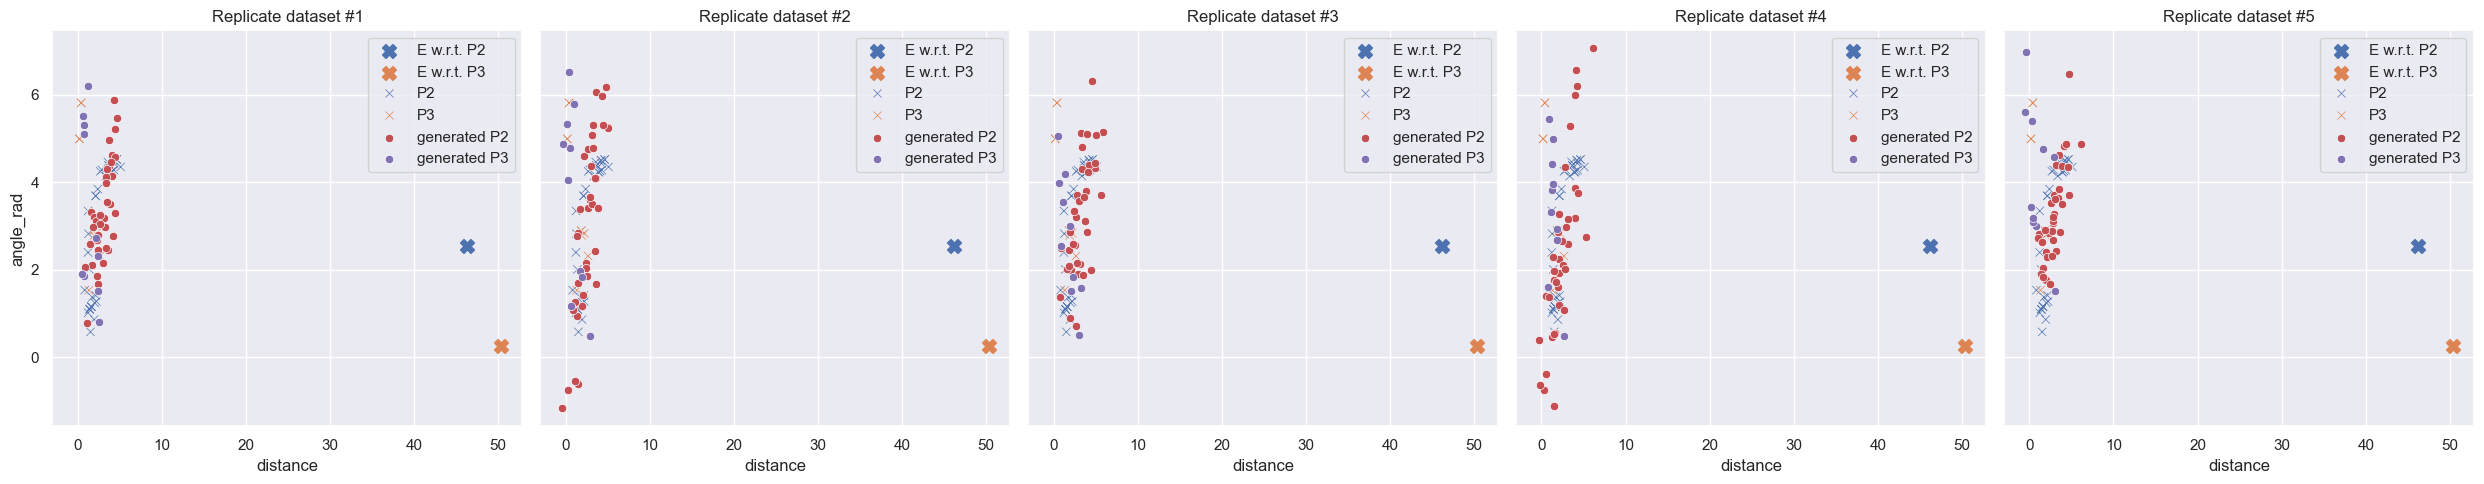

In [11]:

replicate_datasets_p1 = fit.y1_rep
print(replicate_datasets_p1.shape) # n_draws x n_measurements_p1 x 2 (distance, angle_rad)
replicate_datasets_p2 = fit.y2_rep
print(replicate_datasets_p2.shape) # n_draws x n_measurements_p2 x 2 (distance, angle_rad)

# randomly select 5 replicate datasets for each proposal
n_replicates = 5
replicate_indices = np.random.choice(
    replicate_datasets_p1.shape[0], n_replicates, replace=False
)
replicate_datasets_p1 = replicate_datasets_p1[replicate_indices]
replicate_datasets_p2 = replicate_datasets_p2[replicate_indices]
print(replicate_datasets_p1.shape)
print(replicate_datasets_p2.shape)

# plot the posterior predictive
fig, ax = plt.subplots(
    1, n_replicates, figsize=(n_replicates * 5, 5), sharex=True, sharey=True
)
for i in range(n_replicates):
    for proposal_name in proposals:
        proposal_lat_lng = gt_points_df[gt_points_df["name"] == proposal_name][
            ["lat", "lng"]
        ].values[0]
        dist, angle_rad, _ = lat_lng2dist_ang(proposal_lat_lng, [E_lat, E_lng])
        ax[i].scatter(dist, angle_rad, marker="X", label=f"E w.r.t. {proposal_name}", s=100)
    # ax[i].scatter(E_P1_dist, E_P1_angle_rad, label="E w.r.t. P1", marker="X", s=100)
    # ax[i].scatter(E_P2_dist, E_P2_angle_rad, label="E w.r.t. P2", marker="X", s=100)
    sns.scatterplot(
        data=transformed_df,
        x="distance",
        y="angle_rad",
        hue="measured_from",
        ax=ax[i],
        marker="x",
    )
    sns.scatterplot(
        data=pd.DataFrame(replicate_datasets_p1[i], columns=["distance", "angle_rad"]),
        x="distance",
        y="angle_rad",
        ax=ax[i],
        label=f"generated {COMPARE_PROPOSALS[0]}",
    )
    sns.scatterplot(
        data=pd.DataFrame(replicate_datasets_p2[i], columns=["distance", "angle_rad"]),
        x="distance",
        y="angle_rad",
        ax=ax[i],
        label=f"generated {COMPARE_PROPOSALS[1]}",
    )
    
    ax[i].set_title(f"Replicate dataset #{i + 1}")
    ax[i].set_xlabel("distance")
    ax[i].set_ylabel("angle_rad")
    ax[i].legend()

plt.tight_layout()


Mean log likelihood ratio: 1112.4973053174 +- 12.642137757083342, 95% HDI: [-1382.34  4362.11]


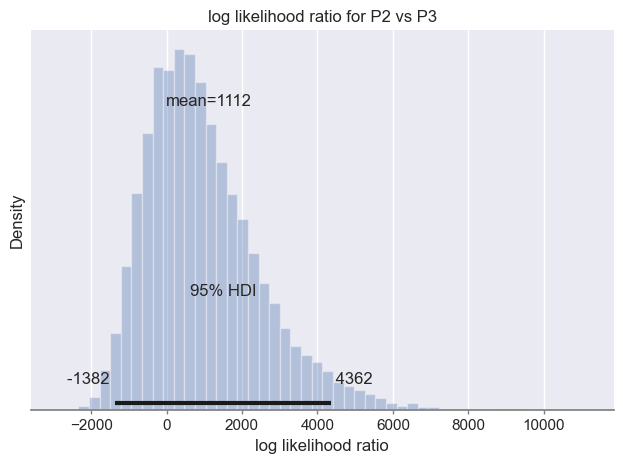

In [12]:
ax = az.plot_posterior(fit, var_names=["log_lik_ratio"], kind="hist", hdi_prob=0.95, bins=50)
ax.set_xlabel("log likelihood ratio")
ax.set_ylabel("Density")
ax.axis("on")
ax.set_title(f"log likelihood ratio for {COMPARE_PROPOSALS[0]} vs {COMPARE_PROPOSALS[1]}")

plt.tight_layout()
plt.savefig(f"figs/{GEOLOCATION}_{COMPARE_PROPOSALS[0]}_vs_{COMPARE_PROPOSALS[1]}_log_lik_ratio.pdf")

log_lik_ratio = fit.log_lik_ratio
mean_lr = np.mean(log_lik_ratio)
mcse_lr = az.stats.mcse(log_lik_ratio)

print(
    f"Mean log likelihood ratio: {mean_lr} +- {mcse_lr}, 95% HDI: {az.hdi(log_lik_ratio, hdi_prob=0.95)}"
)